# SQL Server + SQL Alchemy + Pandas

In [1]:
# Importamos las librerías principales
# En caso de no tener instalado pyobdc ---> Utilizar pip install pyodbc
import pyodbc
import pandas as pd
import sqlalchemy as db
#En caso de no tener instalado sqlAlchemy ---> Utilizar pip install sqlalchemy

## Instalación de SQL Server Express y SQL Server Managment Studio (SSMS)

Para realizar la instalación podemos utilizar la guía del documento 13 - Bases de datos relacionales DDL. Por lo que al iniciar este documento tendremos una sesión de SSMS abierta para ir comprobando como nos conectamos utilizando Python.

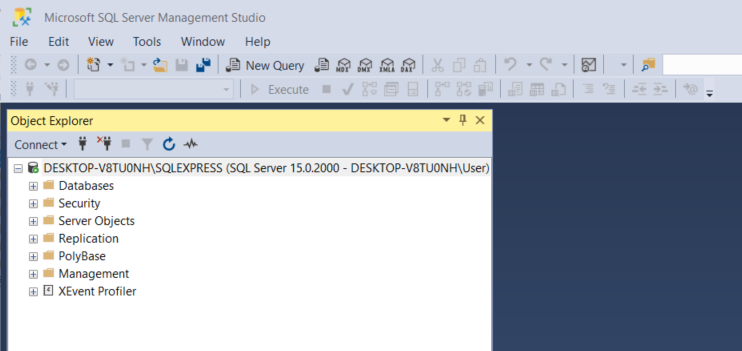



### Probamos la conexión a SQLServer

Vamos a utilizar la cadena de conexión que nos aparece en la instalación de SQL Server Express para configurar la conexión con pyobdc.

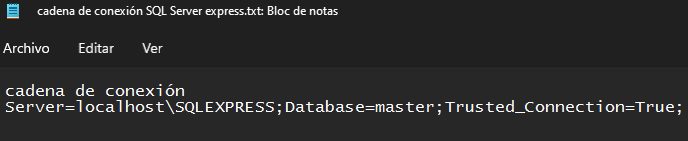

Luego, realizaremos un query a la tabla **dbo.MSreplication_options** de la base de datos **master**.

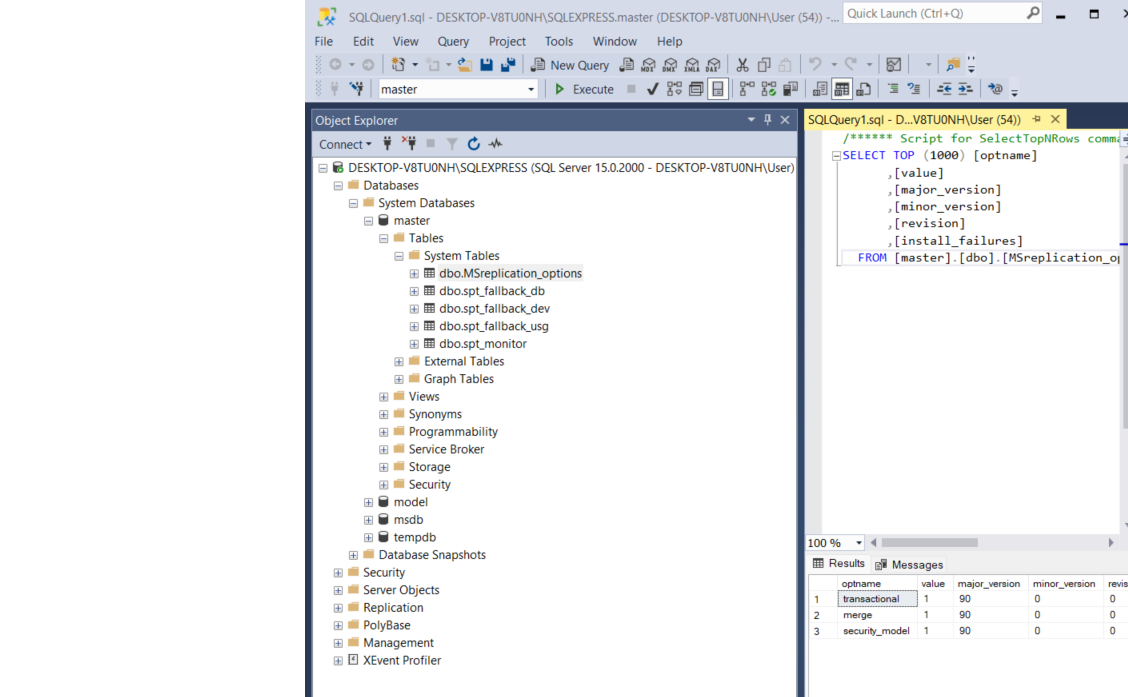

In [2]:
# Creación del objeto de conexión

conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=localhost\SQLEXPRESS;'
                      'Database=master;'
                      'Trusted_Connection=yes;')

conn.autocommit = True

cursor = conn.cursor()
cursor.execute('SELECT * FROM dbo.MSreplication_options')

for i in cursor:
    print(i)

# Cerramos la conexión a la base de datos
conn.close

('transactional', True, 90, 0, 0, 0)
('merge', True, 90, 0, 0, 0)
('security_model', True, 90, 0, 0, 0)


<function Connection.close>

## Pasos generales para trabajar con MySQL

**1. Crear una conexión a la base de datos:** utilizando el *método connect ()* generamos un objeto de conexión a base de datos SQL Server.

**2. Crear un cursor:**  El método *cursor ()* se utiliza para realizar la conexión y ejecutar consultas SQL que nos permiten crear tablas, insertar datos, etc. Para crear un cursor solo necesitamos usar la conexión que ya hemos creado.

**3. Ejecutar una sentencia SQL:** Una vez creado el cursor, podremos ejecutar las sentencias SQL utilizando el método *execute()*.

**4: Realizar un commit:** El método *commit ()* se utiliza para guardar cualquier transacción de forma permanente en el sistema de base de datos. Todas las modificaciones de datos o del sistema realizadas por el comando COMMIT desde el comienzo de las transacciones son de naturaleza permanente y no se pueden deshacer ni revertir, ya que una operación COMMIT exitosa libera todos los recursos de transacción involucrados.

**5: Desconectarnos de la base de datos:** El método *close ()* cierra la conexión a la base de datos.

## Crear una base de datos

In [3]:
# Creación del objeto de conexión

conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=localhost\SQLEXPRESS;'
                      'Trusted_Connection=yes;')

conn.autocommit = True

cursor = conn.cursor()

In [4]:
# Utilizamos este query que equivale al CREATE DATABASE IF NOT EXISTIS de MySQL

query = """IF NOT EXISTS (SELECT 1 FROM sys.databases WHERE [name] = N'commerce')
    CREATE DATABASE commerce;

"""

cursor.execute(query)
conn.close()

Si nos dirigimos al SSMS y hacemos click en el botón de refresh, veremos nuestra DB commerce.
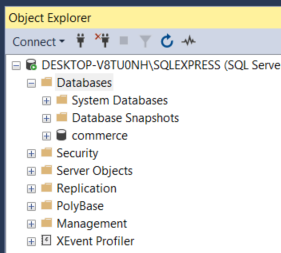

## Borrar una base de datos

In [5]:
# Descomentar en caso de ser necesario
# query = "DROP DATABASE commerce"
# cursor.execute(query)

## Abrimos una nueva conexión a nuestra BD commerce

In [6]:
# Creación del objeto de conexión

conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=localhost\SQLEXPRESS;'
                      'database=commerce;'
                      'Trusted_Connection=yes;')

conn.autocommit = True

cursor = conn.cursor()

## Crear una tabla

* Tipos de datos en SQL Server --> https://learn.microsoft.com/en-us/sql/t-sql/data-types/data-types-transact-sql?view=sql-server-ver16

In [7]:
# Crear una tabla -> Este query es el equivalente a CREATE TABLE IF NOT EXISTS de MySQL.
# También se puede utilizar CREATE TABLE... pero se va a ejecutar solo una vez.

query = """IF NOT EXISTS (SELECT * FROM sysobjects WHERE name='orders' and xtype='U')
        CREATE TABLE orders (
            orderId INT,
            totalPrice DECIMAL(10,2),
            address VARCHAR(50)
            )"""

cursor.execute(query)
conn.commit()

### Verificamos la creación de la tabla en SSMS

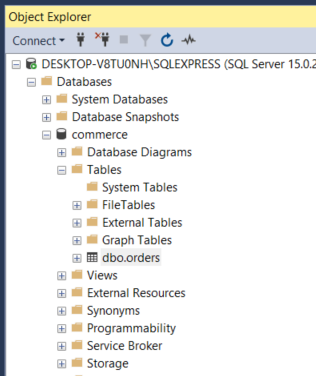

## Insertar datos

In [8]:
# Método 1: Utilizando el método execute()

query = """INSERT INTO orders (orderId, totalPrice, address) VALUES
            (546, 3489.98, 'Buenos Aires 989'),
            (547, 6897.00, 'Espronceda 3218'),
            (560, 7542.35, 'Pasteur 1788'),
            (562, 11432.00, 'Galicia 1252')"""
cursor.execute(query)
conn.commit()

In [9]:
# Método 2: Utilizando el método executemany()
order_data = [
    (546, 3489.98, 'Buenos Aires 989'),
    (547, 6897, 'Espronceda 3218'),
    (560, 7542.35, 'Pasteur 1788'),
    (562, 11432, 'Galicia 1252')
]

query = "INSERT INTO orders (orderId, totalPrice, address) VALUES(?, ?, ?)"
cursor.executemany(query,order_data)
conn.commit()

## Seleccionar datos

In [10]:
# Seleccionar un dato utilizando fetchone
query = "SELECT * FROM orders"
cursor.execute(query)
one_result = cursor.fetchone()
print(one_result)

(546, Decimal('3489.98'), 'Buenos Aires 989')


In [11]:
# Seleccionar un dato utilizando fetchmany
query = "SELECT * FROM orders"
cursor.execute(query)
results = cursor.fetchmany(2)
for res in results:
    print(res)

(546, Decimal('3489.98'), 'Buenos Aires 989')
(547, Decimal('6897.00'), 'Espronceda 3218')


In [12]:
# Seleccionar un dato utilizando fetchall
query = "SELECT * FROM orders"
cursor.execute(query)
results = cursor.fetchall()
for res in results:
    print(res)

(546, Decimal('3489.98'), 'Buenos Aires 989')
(547, Decimal('6897.00'), 'Espronceda 3218')
(560, Decimal('7542.35'), 'Pasteur 1788')
(562, Decimal('11432.00'), 'Galicia 1252')
(546, Decimal('3489.98'), 'Buenos Aires 989')
(547, Decimal('6897.00'), 'Espronceda 3218')
(560, Decimal('7542.35'), 'Pasteur 1788')
(562, Decimal('11432.00'), 'Galicia 1252')


## Actualizar datos

In [13]:
# Update data
query = """UPDATE orders
            SET totalPrice = 6150.80
            WHERE address = 'Buenos Aires 989'
            
"""
cursor.execute(query)
conn.commit()

# Seleccionar todos los datos utilizando fetchall
query = "SELECT * FROM orders"
cursor.execute(query)
results = cursor.fetchall()
for r in results:
    print(r)

(546, Decimal('6150.80'), 'Buenos Aires 989')
(547, Decimal('6897.00'), 'Espronceda 3218')
(560, Decimal('7542.35'), 'Pasteur 1788')
(562, Decimal('11432.00'), 'Galicia 1252')
(546, Decimal('6150.80'), 'Buenos Aires 989')
(547, Decimal('6897.00'), 'Espronceda 3218')
(560, Decimal('7542.35'), 'Pasteur 1788')
(562, Decimal('11432.00'), 'Galicia 1252')


**Si ejecutamos el query en SSMS veremos el mismo resultado**

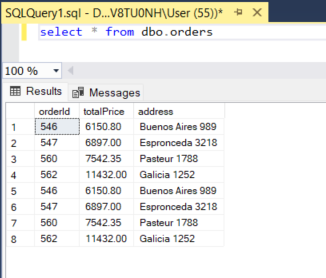

## Borrar datos

In [14]:
# Borrar datos
query = "DELETE FROM orders WHERE address = 'Pasteur 1788'"
cursor.execute(query)

# Seleccionar todos los datos utilizando fetchall
query = "SELECT * FROM orders"
cursor.execute(query)
results = cursor.fetchall()
for r in results:
    print(r)

(546, Decimal('6150.80'), 'Buenos Aires 989')
(547, Decimal('6897.00'), 'Espronceda 3218')
(562, Decimal('11432.00'), 'Galicia 1252')
(546, Decimal('6150.80'), 'Buenos Aires 989')
(547, Decimal('6897.00'), 'Espronceda 3218')
(562, Decimal('11432.00'), 'Galicia 1252')


## Otros comandos. Descomentar de acuerdo a tu necesidad y ejecutar

In [15]:
# Close connection
# conn.close()

# query = "DROP TABLE orders"
# cursor.execute(query)
# conn.commit()

## SQL Alchemy + Pandas

### Conectarse utilzando un engine de SQLAlchemy
En este caso vamos a utilizar un engine de SQLAlchemy para luego conectarnos a la base de datos commerce.
Luego vamos a utilizar el método read_sql de la librería Pandas para consultar la base de datos y obtener un dataframe.

In [16]:
# Cerramos la conexión con pyodbc
conn.close()

# Controlamos los drivers que tenemos instalados y nos quedamos con el último
pyodbc.drivers()

['SQL Server',
 'Microsoft Access Driver (*.mdb, *.accdb)',
 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)',
 'Microsoft Access dBASE Driver (*.dbf, *.ndx, *.mdx)',
 'Microsoft Access Text Driver (*.txt, *.csv)',
 'SQL Server Native Client 11.0',
 'SQL Server Native Client RDA 11.0',
 'ODBC Driver 17 for SQL Server']

In [17]:
# Preparamos el engine de SQLAlchemy
servername = 'localhost\SQLEXPRESS'
dbname = 'commerce'
engine = db.create_engine('mssql+pyodbc://@' + servername + '/' + dbname + '?driver=ODBC+Driver+17+for+SQL+Server')

# Nos conectamos al engine
sqla_connection = engine.connect()

## Seleccionar datos

In [18]:
# Obtener un dataframe a partir del método read_sql
query = "SELECT * FROM orders"
data = pd.read_sql(query, con=sqla_connection)
data.head()

,orderId,totalPrice,address
0,546,6150.8,Buenos Aires 989
1,547,6897.0,Espronceda 3218
2,562,11432.0,Galicia 1252
3,546,6150.8,Buenos Aires 989
4,547,6897.0,Espronceda 3218


In [19]:
# Obtener un dataframe a partir del método read_sql_table
pd.read_sql_table('orders',con=sqla_connection)

,orderId,totalPrice,address
0,546,6150.8,Buenos Aires 989
1,547,6897.0,Espronceda 3218
2,562,11432.0,Galicia 1252
3,546,6150.8,Buenos Aires 989
4,547,6897.0,Espronceda 3218
5,562,11432.0,Galicia 1252


## Insertar datos

In [20]:
# Para insertar estos datos, previamente descargar el archivo txt que se encuetra en el siguiente link
# https://drive.google.com/file/d/1pJfxW_gUedQlVsO55tVzbQ-FXjk4-jBF/view?usp=sharing'


# Leer el archivo con Pandas. Reemplazar la ruta de la variable path con la de tu archivo.
path = "C:/Users/User/Documents/Alkemy/Prisma/full_orders.txt"
df = pd.read_csv(path, sep ='\t')
df

,orderId,totalPrice,address
0,1083,6267,Gelpi 3162
1,1249,2467,Rivadavia 4190
2,1341,6747,Medrano 3843
3,191,12051,Montevideo 4348
4,944,11351,Payro 3518
...,...,...,...
95,272,532,Rivadavia 4781
96,789,13636,24 de Octubre 3644
97,830,5132,Dominguez 4853
98,225,7506,Laguna 4021


In [21]:
# Insertar datos en la BD utilzando el método to_sql
df.to_sql(name='orders', con=sqla_connection, if_exists='append', index = False)

-1

In [22]:
# Comprobación
query = "SELECT * FROM orders"
data = pd.read_sql(query, con=sqla_connection)
data

,orderId,totalPrice,address
0,546,6150.8,Buenos Aires 989
1,547,6897.0,Espronceda 3218
2,1083,6267.0,Gelpi 3162
3,562,11432.0,Galicia 1252
4,546,6150.8,Buenos Aires 989
...,...,...,...
101,272,532.0,Rivadavia 4781
102,789,13636.0,24 de Octubre 3644
103,830,5132.0,Dominguez 4853
104,225,7506.0,Laguna 4021
